In [10]:
from matplotlib.image import imread
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
plt.rcParams['figure.figsize'] = [6, 6]
plt.rcParams.update({'font.size':18})

## Reconstruction of Lenna Image

In [11]:
A = imread("../../data/other/Lenna_512x512.png")
B = np.mean(A, -1)

(-0.5, 511.5, 511.5, -0.5)

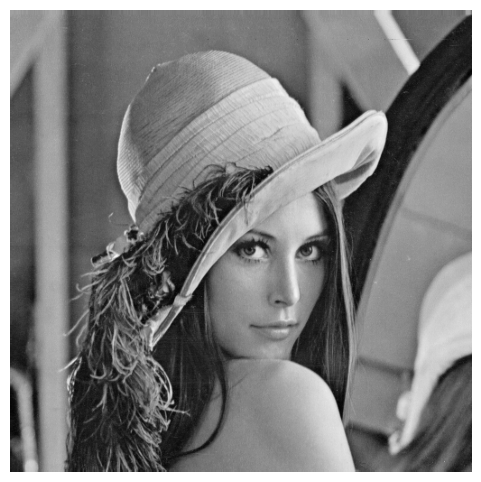

In [12]:
plt.figure()
plt.imshow(B, cmap='gray')
plt.axis('off')

## Decomposing

In [13]:
Bt = np.fft.fft2(B)
Btsort = np.sort(np.abs(Bt.reshape(-1)))

(-0.5, 511.5, 511.5, -0.5)

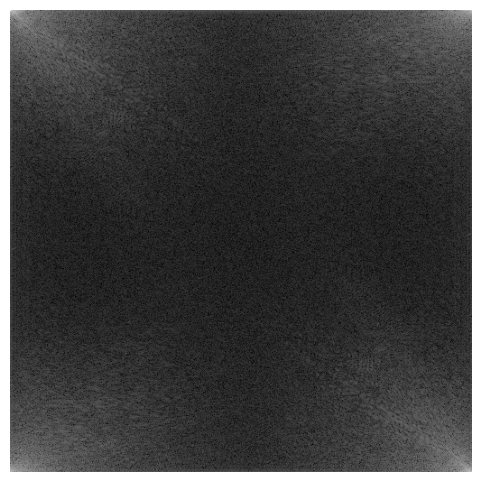

In [14]:
plt.imshow(np.log(np.abs(Bt) + 1),cmap='gray')
plt.axis('off')

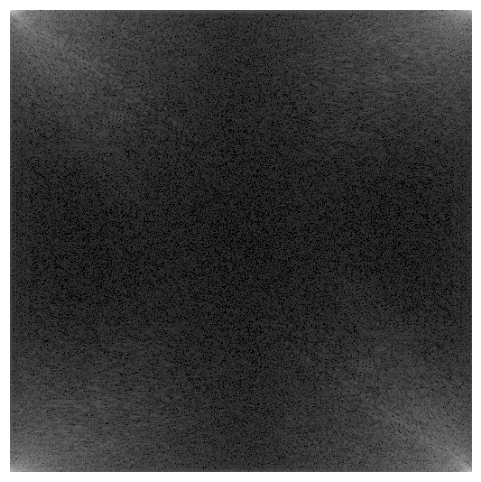

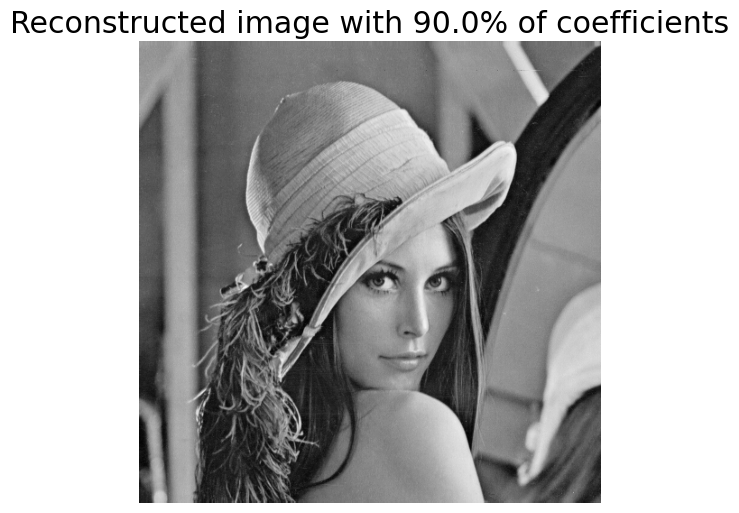

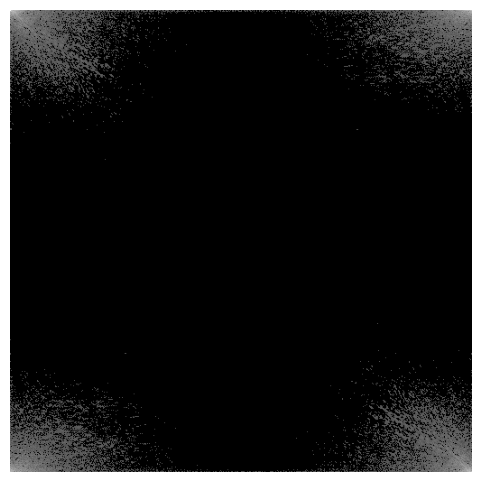

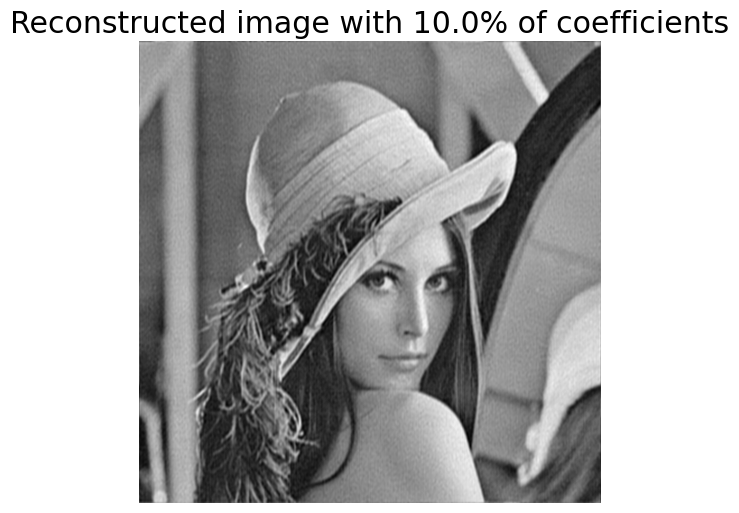

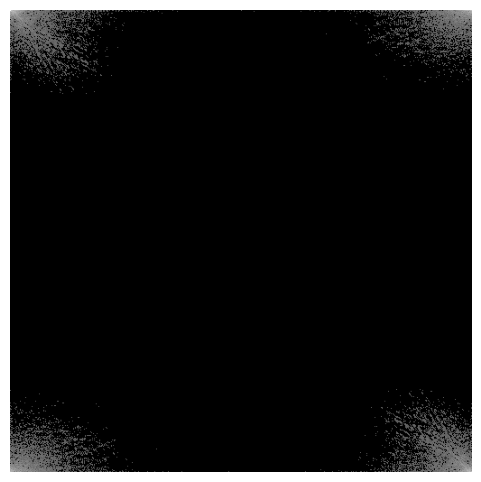

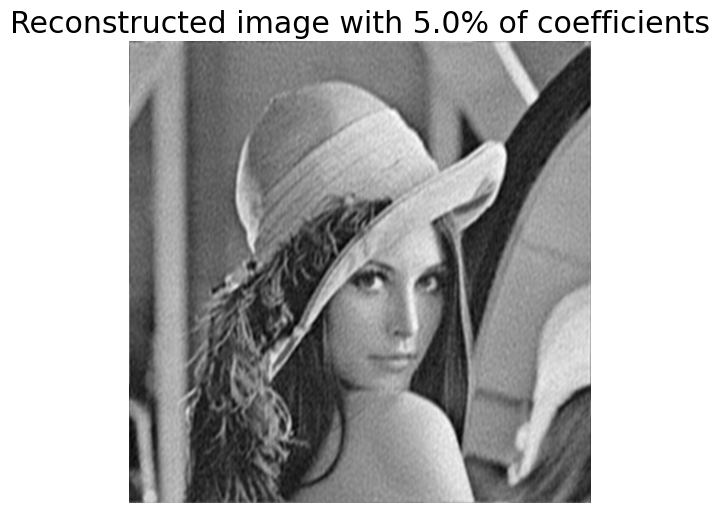

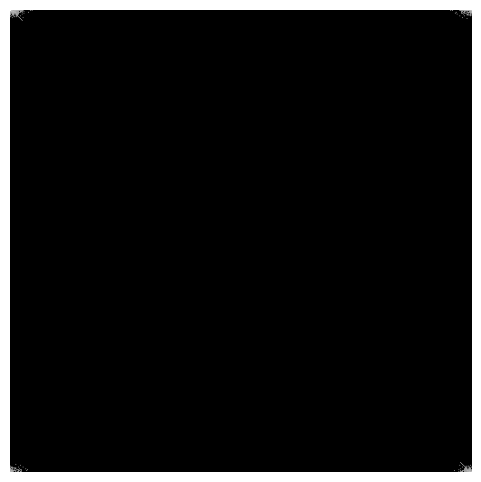

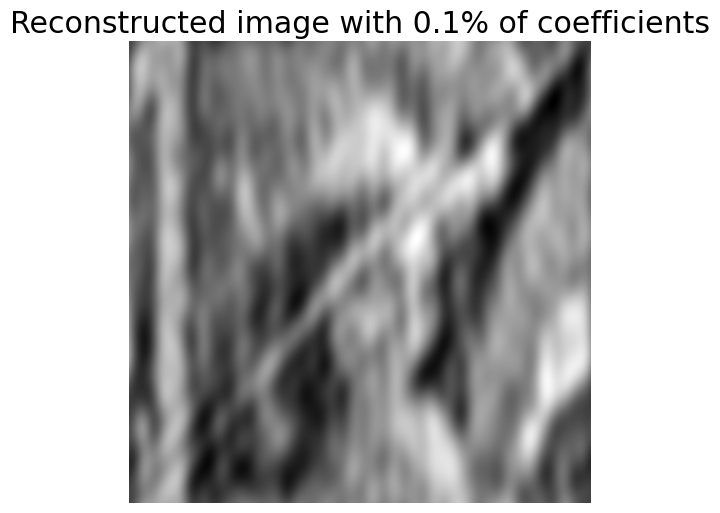

In [22]:
# Zero all small coefficients 
i = 0
for keep in [0.9, 0.1, 0.05, 0.001]:
    thresh = Btsort[int(np.floor((1-keep)*len(Btsort)))]
    ind = np.abs(Bt) > thresh # Find small indices
    Filtered_coefficients = Bt * ind
    B_rec = np.fft.ifft2(Filtered_coefficients).real
    i += 1
    cv2.imwrite("compressed_" + str(i) + ".png", B_rec)
    plt.imshow(np.log(np.abs(Filtered_coefficients) + 1),cmap='gray')
    plt.axis('off')
    plt.figure()
    plt.imshow(B_rec, cmap='gray')
    plt.title(f"Reconstructed image with {keep * 100}% of coefficients")
    plt.axis('off')
    plt.show()


## Compression of dataset